## Compression Uing Singular value decomposition on Coloured Image

Repository :https://github.com/Gitpabora/Data_reduction_compression

## CCE AIML -learners project on  data compression for Machine learning
###members : Shristi Singh, Parinita Bora



###This notebook experiments SVD 

references  :
 https://en.wikipedia.org/wiki/Singular_value_decomposition

 https://iopscience.iop.org/article/10.1088/1757-899X/263/4/042082

#### SVD was proposed independently by Eugenio Beltrami , Camille Jordon over 100 yrs back.
The aim is to find optimal set of factors for predicting optimal outcome




Mathematically Singular value decomposition is a method of factorizing a matrix M into three matrices (U, S, V*)

<img align="right" src="https://raw.github.com/Gitpabora/Data_reduction_compression/tree/main/data/output/SVD_image.png" width="200">






Algorithm:

1. getting  three component matrices with  Red , Blue and green constituents 
3. Applying SVD on each of the three components to generate three vectors for each of the matrices 
4. Preserving only K ie Selecting k columns from U matrix and k rows from VT matrix
5. Reconstructing the coloured components from U and V
7. Final image is formed by concatenating the three components
8. Calculating the compression ratio.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [ ]:
from google.colab import files 

In [ ]:
# input file downloaded online 
file=files.upload()

Saving sample_image.jpg to sample_image (2).jpg


In [ ]:
!pwd

/content


In [ ]:
!ls -l

total 268
drwxr-xr-x 1 root root  4096 Nov 22 00:14  sample_data
-rw-r--r-- 1 root root 89481 Nov 29 00:09 'sample_image (1).jpg'
-rw-r--r-- 1 root root 89481 Nov 29 00:47 'sample_image (2).jpg'
-rw-r--r-- 1 root root 89481 Nov 28 23:52  sample_image.jpg


In [ ]:

from PIL import Image


In [ ]:
!pwd

/content


In [ ]:
imageArray = np.array(Image.open("/content/sample_image.jpg"))
imageArray.shape

(570, 985, 3)

In [ ]:
# Normalize 
input_image = imageArray / 255

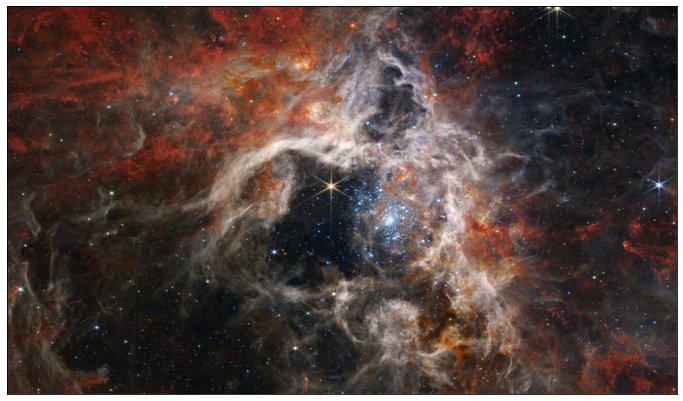

In [ ]:
# Display the image
fig = plt.figure(figsize = (12, 10))
a = fig.add_subplot(1, 1, 1)
plt.tick_params(bottom = False, left = False, labelbottom = False, labelleft = False)

imgplot = plt.imshow(input_image)

plt.show()

In [ ]:
original_Bytes = input_image.nbytes
print( "The space  needed to store", original_Bytes, "bytes",original_Bytes/1024, "KB",original_Bytes/(1024*1024) , "MB"
      )


The space  needed to store 13474800 bytes 13158.984375 KB 12.850570678710938 MB


In [ ]:
# three different arrays based on colors
img_red = input_image[:, :, 0]
img_green = input_image[:, :, 1]
img_blue = input_image[:, :, 2]

In [ ]:
# SVD of three matrices
u_r, d_r, vt_r = np.linalg.svd(img_red, full_matrices =  True )
u_g, d_g, vt_g = np.linalg.svd(img_green, full_matrices = True)
u_b, d_b, vt_b = np.linalg.svd(img_blue, full_matrices = True)


In [ ]:
u_r.shape, d_r.shape, vt_r.shape

((570, 570), (570,), (985, 985))

In [ ]:
# Check for the bytes to be stored
bytes_stored = sum([m.nbytes for m in [u_r, d_r, vt_r, u_g, d_g, vt_g, u_b, d_b, vt_b]])
print( "The three matrices tneeds  total  bytes, KB, MB",bytes_stored, bytes_stored/1024,bytes_stored/(1024*1024))

The three matrices tneeds  total  bytes, KB, MB 31096680 30367.8515625 29.656105041503906


In [ ]:
#preserving only first k values and setting remining to zero



k = 100

# Selecting k columns from U matrix and k rows from VT matrix
k_u_r = u_r[:, 0:k]
k_u_j = u_g[:, 0:k]
k_u_b = u_b[:, 0:k]

k_vt_r = vt_r[0:k,: ]
k_vt_g = vt_g[0:k,: ]
k_vt_b = vt_b[0:k,: ]

k_d_r = d_r[0:k]
k_d_g = d_g[0:k]
k_d_b = d_b[0:k]


In [ ]:
k_vt_r.shape , k_vt_g.shape  , k_vt_b.shape

((100, 985), (100, 985), (100, 985))

In [ ]:
compressed_Bytes = sum([m.nbytes for m in [k_u_r, k_d_r, k_vt_r, k_u_j, k_d_g, k_vt_g, k_u_b, k_d_b, k_vt_b]])
print( 'The compressed size is' , compressed_Bytes/(1024*1024), 'MB' )

ratio = (original_Bytes-compressed_Bytes) / original_Bytes * 100
print('\nThe compression ratio of sizes of original image and compressed image is %.2f%s'  %(ratio, '%'))



The compressed size is 3.5614013671875 MB

The compression ratio of sizes of original image and compressed image is 72.29%


In [ ]:
k_u_r.shape , k_d_r.shape , k_vt_r.shape

((570, 100), (100,), (100, 985))

In [ ]:
%pylab inline
#fig, ax = plt.subplots(1,3,figsize=(12,10), tight_layout  =  True)
#fig.suptitle("SVD image compression")
#ax[0].set_title("redcomponent image")
#ax[1].set_title("green component image")
#ax[2].set_title("blue component image")

#ax[0].axis('off')
#ax[0].imshow( k_vt_r)
#ax[1].axis('off')
#ax[1].imshow(k_vt_g)
#ax[2].axis('off')
#ax[2].imshow(k_vt_b)
#ax[3].axis('off')
#ax[3].imshow(k_vt_b, cmap='gray')
#plt.show()

Populating the interactive namespace from numpy and matplotlib


In [ ]:
a = np.random.randn(570, 985) + 1j*  np.random.randn(570,985)
a.shape


(570, 985)

In [ ]:
# matrices colourwise
image_red_ = np.dot(k_u_r, np.dot(np.diag(k_d_r), k_vt_r[:570,:985]))

image_green_ = np.dot(k_u_j, np.dot(np.diag(k_d_g), k_vt_g[:570,:985]))
image_blue_= np.dot(k_u_b, np.dot(np.diag(k_d_b), k_vt_b[:570,:985]))

# Reconstructing original
image_r = np.zeros((input_image.shape[0], input_image.shape[1], 3))

image_r[:, :, 0] = image_red_
image_r[:, :, 1] = image_green_
image_r[:, :, 2] = image_blue_

# Correction for intensity of the pixels with intensity range  outside[0,1]
image_r[image_r < 0] = 0
image_r[image_r > 1] = 1

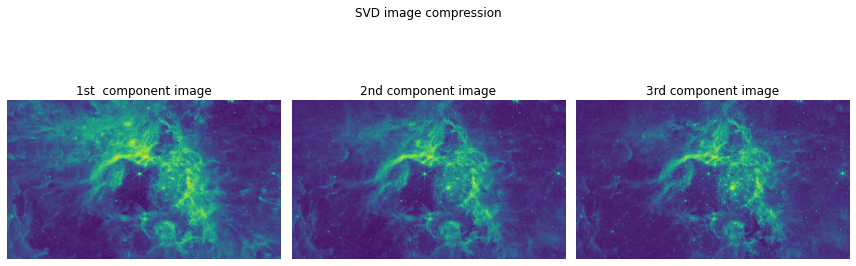

In [ ]:
#pylab inline
fig, ax = plt.subplots(1,3,figsize=(12,5), tight_layout  =  True)
fig.suptitle("SVD image compression")
ax[0].set_title("1st  component image")
ax[1].set_title("2nd component image")
ax[2].set_title("3rd component image")

ax[0].axis('off')
ax[0].imshow( image_red_)
ax[1].axis('off')
ax[1].imshow(image_green_)
ax[2].axis('off')
ax[2].imshow(image_blue_)
#ax[3].axis('off')
#ax[3].imshow(k_vt_b, cmap='gray')
#plt.show()

Populating the interactive namespace from numpy and matplotlib


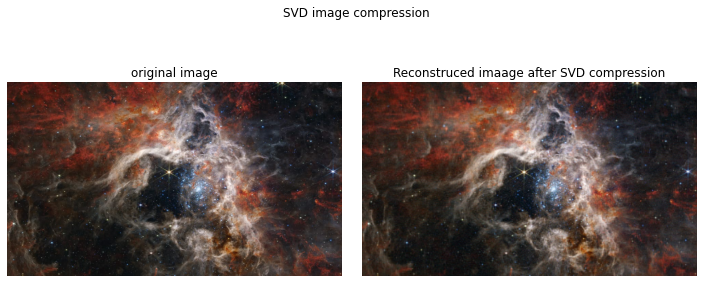


The compression ratio of sizes of original image and compressed image was 72.29%


In [ ]:
%pylab inline
fig, ax = plt.subplots(1,2,figsize=(10,5), tight_layout  =  True)
fig.suptitle("SVD image compression")
ax[0].set_title("original image")
ax[1].set_title("Reconstruced imaage after SVD compression")


ax[0].axis('off')
ax[0].imshow(input_image)
ax[1].axis('off')
ax[1].imshow(image_r, cmap='gray')
#ax.imshow(image_r, cmap='gray')
plt.show()

print('\nThe compression ratio of sizes of original image and compressed image was %.2f%s'  %(ratio, '%'))

###Comparing the reconstructed image with original image

In [ ]:
print("Original image shape", input_image.shape)

Original image shape (570, 985, 3)


In [ ]:
print("Re-constructed Image after compresseion", image_r.shape)

Re-constructed Image after compresseion (570, 985, 3)


In [ ]:
img_red.shape

(570, 985)